# Misc figures of AU-emotion mappings project
Just for documentation purposes. See `figures.ipynb` for the visualizatin of results.

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['figure.facecolor'] = "white"

## Figure 1: overview method
Made in google draw, but used the mapping matrix below:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


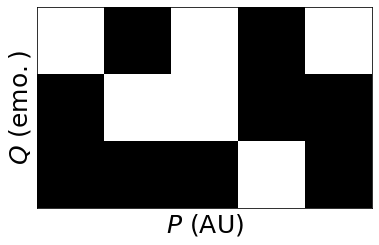

In [3]:
M_classes = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Surprise', 'Sadness']
AUs = ['AU4', 'AU9', 'AU10', 'AU12', 'AU23']

M_mapping = [
    ['AU4', 'AU23', 'AU10'],
    ['AU9', 'AU10'],
    ['AU12']
]

M = [[1 if au in mapp else 0 for au in AUs]
     for mapp in M_mapping]

M = np.array(M)
plt.imshow(M, cmap='gray', aspect=1)
plt.xticks([])
plt.yticks([])
plt.ylabel(r'$Q\ \mathrm{(emo.)}$', fontsize=25)
plt.xlabel(r'$P\ \mathrm{(AU)}$', fontsize=25)
plt.show()

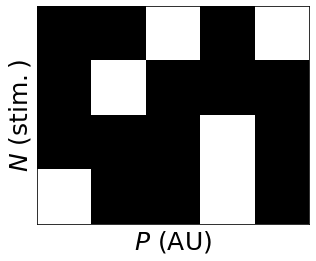

In [4]:
S_ = [
    ['AU10', 'AU23'],
    ['AU9'],
    ['AU12'],
    ['AU4', 'AU12']
]

S = [[1 if au in stim else 0 for au in AUs]
      for stim in S_]
E = [0, 1, 2, 1]
E = np.array([e == np.arange(3) for e in E]).astype(int)
S = np.array(S)
plt.imshow(S, cmap='gray', aspect=1)
plt.xticks([])
plt.yticks([])
plt.ylabel(r'$N\ \mathrm{(stim.)}$', fontsize=25)
plt.xlabel(r'$P\ \mathrm{(AU)}$', fontsize=25)
plt.show()

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


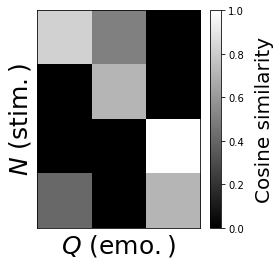

In [5]:
norm = np.sqrt((S ** 2).sum(axis=1, keepdims=True) @ (M.T ** 2).sum(axis=0, keepdims=True)) 
ϕ = (S @ M.T) / norm

# Alternatively, using scikit-learn:
# from sklearn.metrics.pairwise import cosine_similarity
# cosine_similarity(S, M)

im = plt.imshow(ϕ, cmap='gray', aspect=1)
plt.xticks([])
plt.yticks([])
plt.colorbar(im,fraction=0.05, pad=0.03)
plt.text(3.5, 1.5, 'Cosine similarity', rotation=90, va='center', fontsize=20)
plt.ylabel(r'$N\ \mathrm{(stim.)}$', fontsize=25)
plt.xlabel(r'$Q\ \mathrm{(emo.)}$', fontsize=25)
plt.show()

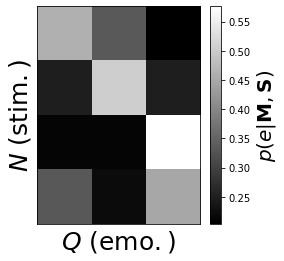

In [6]:
def softmax_2d(arr, beta):
    """ Vectorized softmax implementation including an inverse temperature
    parameter (beta). It assumes a 2D array with stimuli x features (similarities). """
    scaled = beta * arr
    num = np.exp(scaled - scaled.max(axis=1, keepdims=True))
    denom = np.sum(num, axis=1, keepdims=True)
    return num / denom

pE = softmax_2d(ϕ, 1)
im = plt.imshow(pE, cmap='gray', aspect=1)
plt.xticks([])
plt.yticks([])
plt.colorbar(im,fraction=0.05, pad=0.03)
plt.text(3.5, 1.5, r'$p(e | \mathbf{M}, \mathbf{S})$', rotation=90, va='center', fontsize=20)
plt.ylabel(r'$N\ \mathrm{(stim.)}$', fontsize=25)
plt.xlabel(r'$Q\ \mathrm{(emo.)}$', fontsize=25)
plt.show()

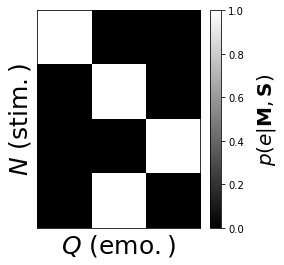

In [7]:
im = plt.imshow(E, cmap='gray', aspect=1)
plt.xticks([])
plt.yticks([])
plt.colorbar(im,fraction=0.05, pad=0.03)
plt.text(3.5, 1.5, r'$p(e | \mathbf{M}, \mathbf{S})$', rotation=90, va='center', fontsize=20)
plt.ylabel(r'$N\ \mathrm{(stim.)}$', fontsize=25)
plt.xlabel(r'$Q\ \mathrm{(emo.)}$', fontsize=25)
plt.show()

In [8]:
print(pE.round(2))
print(E)

[[0.46 0.34 0.2 ]
 [0.25 0.5  0.25]
 [0.21 0.21 0.58]
 [0.33 0.22 0.45]]
[[1 0 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]]


[Text(0, 0, ''), Text(1, 0, ''), Text(2, 0, '')]

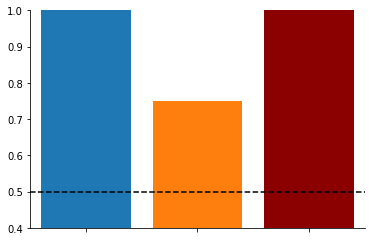

In [9]:
from sklearn.metrics import roc_auc_score
#mask = E.sum(axis=0) != 0
#roc_auc_score(E[:, mask], softmax_2d(ϕ[:, mask], 1))
score = roc_auc_score(E, pE, average=None)

plt.bar([0, 1, 2], score, color=['tab:blue', 'tab:orange', 'darkred'])
sns.despine()
plt.xlim(-0.5, 2.5)
plt.ylim(0.4, 1)
plt.axhline(0.5, ls='--', c='k')
plt.xticks([0, 1, 2])
plt.gca().set_xticklabels([])

## Figure 2: noise ceiling explanation
Made in google draw.